# About

**This Lab Enhancement : Linear Regression is prepared by** 

- Group Member 1 - Nur Damia Binti Rohisyam (Student ID - 1211304435)

- Group Member 2 - Faqihah Binti Zakir (Student ID - 1211303109)

- Group Member 3 - Muhammad Zafri Bin Marwan (Student ID - 1201101871)

**Objective:**

The purpose of this lab tutorial was to demonstrate the process of building and evaluating a linear regression model to predict housing prices using the California housing dataset.

**Dataset Description:**

Dataset used from sk-learn which is the California house dataset



Linear Regression is a simple yet powerful algorithm for predicting a continuous target variable. The goal is to find the linear relationship between the features (independent variables) and the target (dependent variable).

In [9]:
# Importing Necessary Libraries
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_california_housing
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [15]:
# ## Load and Explore the Dataset
# For this tutorial, we'll use a simple dataset: the California Housing dataset, which is available in `scikit-learn`.

from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()

In [16]:
# Convert to pandas DataFrame
data = pd.DataFrame(housing.data, columns=housing.feature_names)
data['MedHouseVal'] = housing.target

# Display the first few rows of the dataset
print(data.head())


   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422  


In [19]:
data.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


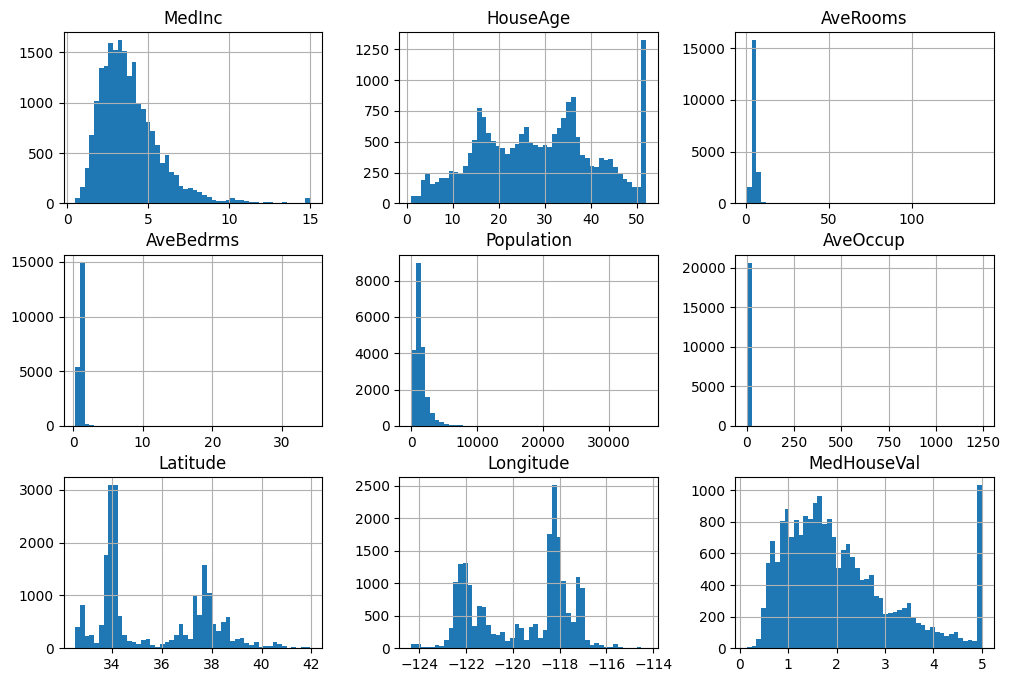

In [20]:
data.hist(bins=50, figsize=(12,8))
plt.show()

From the above histograms of the different features, we can conclude that:
1. Features are distributed on very different scales
2. In HouseAge and HouseValue columns the values are capped at 50 and 5 respectively.

For better accuracy, we should preprocess those features. We can either perform feature engineering or clean those problematic instances.

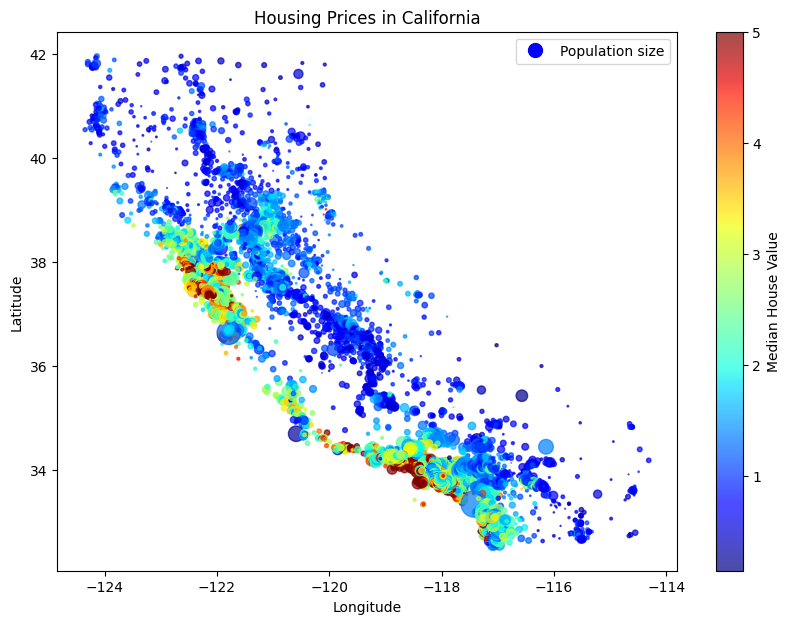

In [23]:
# Create the scatter plot
plt.figure(figsize=(10, 7))
scatter = plt.scatter(data['Longitude'], data['Latitude'], 
                      c=data['MedHouseVal'], cmap='jet', 
                      s=data['Population']/100, label='population', alpha=0.7)
plt.colorbar(label='Median House Value')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Housing Prices in California')

# Creating a custom legend
import matplotlib.lines as mlines
population_legend = mlines.Line2D([], [], color='blue', marker='o', linestyle='None',
                          markersize=10, label='Population size')
plt.legend(handles=[population_legend])

# Display the plot
plt.show()

The above plot displays the map of California, with the color map corresponding to house value and the radius of the circles corresponding to the population of the areas. Based on this plot, we can conclude that:
1. Houses near ocean value more.
2. House in high population density area also value more but the effect decreases as we move further away from the ocean.
3. And there are some outliers

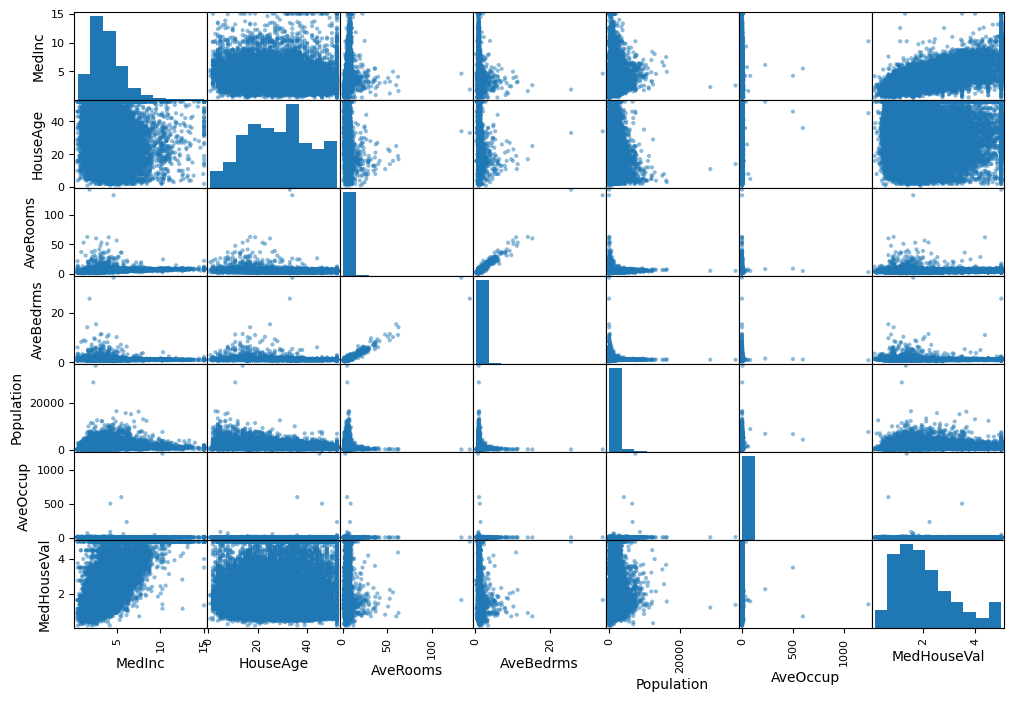

In [25]:
# Import necessary functions
from pandas.plotting import scatter_matrix

# Define the attributes to plot
attributes = ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'MedHouseVal']

# Create the scatter matrix
scatter_matrix(data[attributes], figsize=(12, 8))
plt.show()

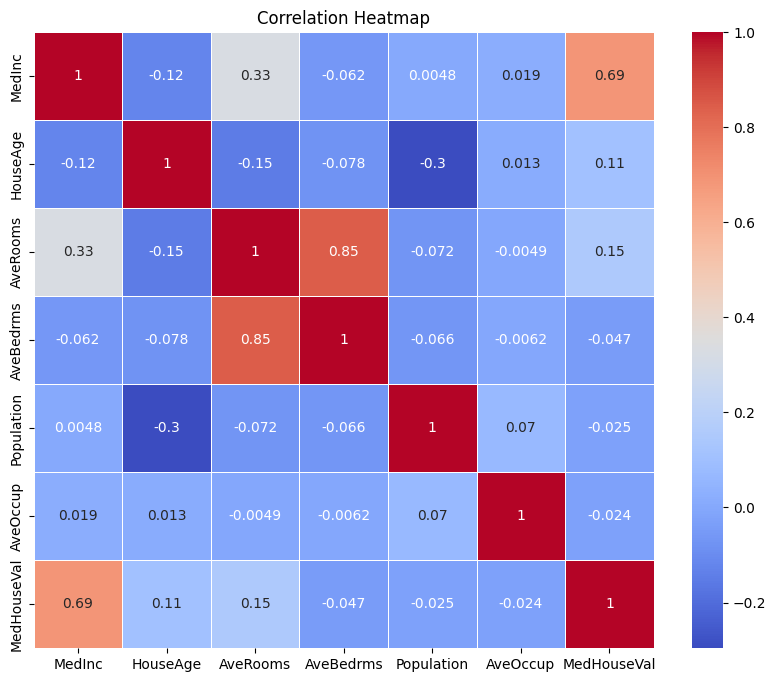

In [26]:
# Import necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Define the attributes for correlation
attributes = ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'MedHouseVal']

# Calculate the correlation matrix
correlation_matrix = data[attributes].corr()

# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


The above correlation heatmap shows a strong linear correlation between median income and House value. There is also strong correlation between Bedrooms and Rooms.

In [27]:
#check for missing values
data.isna().sum()

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

Since the values are all numeric already, we can proceed to splitting the dataset.

In [29]:
X = data.iloc[:,:-1]
y = data.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
#fitting the model
regression_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', LinearRegression())
])
regression_pipeline.fit(X_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('regressor', LinearRegression())])

For better accuracy, standard scaling is applied. The Pipeline first applies the standardScaler() function to the features and then calls the Linear Regression Model. Using a Pipeline makes the code cleaner, reusable, and reduces a lot of boilerplate code.

In [33]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

y_pred = regression_pipeline.predict(X_test)
# Calculate RMSE, MAE, and R² score
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the metrics
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R² Score: {r2}")


Root Mean Squared Error (RMSE): 0.7455813830127763
Mean Absolute Error (MAE): 0.5332001304956565
R² Score: 0.575787706032451


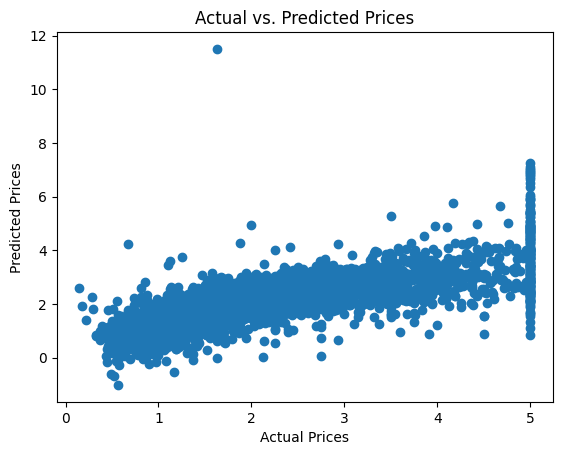

In [34]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs. Predicted Prices")
plt.show()

The scatter plot visually represents the model's performance, and from the image, we can see some level of correlation but also some spread indicating prediction errors.

The R2 score achieved is only 0.57, which is not very high. To achieve a higher score, advanced regression regularization techniques or different algorithms, such as random forest, should be used.

**Interpretation:**

The R² score of 0.576 indicates that the linear regression model explains about 57.6% of the variance in the housing prices. While this is a decent start, it suggests there is still significant unexplained variance, meaning the model can be improved.
The RMSE and MAE values provide an understanding of the average prediction error. An RMSE of 0.746 and MAE of 0.533 indicate that, on average, the model's predictions are somewhat close to the actual values, but there is room for improvement.

**Conclusion:**

Linear regression is a valuable tool in a data scientist's toolkit due to its simplicity and interpretability. While it may not always provide the best predictive performance, it offers a solid baseline and valuable insights into the relationships between features and the target variable. For this lab, it served its purpose of illustrating the fundamental steps in building and evaluating a regression model. Future work can focus on leveraging more advanced techniques to improve predictive accuracy.